In [1]:
# 데이터 분석 패키지
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#데이터 시각화(추세 등) 패키지
import seaborn as sns

# 가설검정 및 통계분석 패키지
from scipy import stats


from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
import matplotlib.cm
print(matplotlib.cm.cmap_d.keys())

KeysView(<matplotlib.cm._DeprecatedCmapDictWrapper object at 0x7f9698999040>)


In [3]:
df_raw = pd.read_csv('/Users/juyeon/Desktop/빅데이터 프로젝트/DATA/A2_유아용품/Sales_data.csv')
df_raw

/var/folders/f2/nhwmstw91jvf4lfg4wk_7j440000gn/T/ipykernel_18229/37339747.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('/Users/juyeon/Desktop/빅데이터 프로젝트/DATA/A2_유아용품/Sales_data.csv')


,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형)
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형)
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형)
...,...,...,...,...,...,...,...,...,...,...
199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA)
199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스
199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA)
199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스


In [4]:
# 데이터 행, 열 갯수 확인
df_raw.shape

(199999, 10)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   주문번호       199999 non-null  object 
 1   구매일        199999 non-null  object 
 2   배송시작일      199999 non-null  object 
 3   배송완료일      199999 non-null  object 
 4   구매시월령(수정)  168142 non-null  float64
 5   고객번호       199999 non-null  object 
 6   구매금액       199999 non-null  int64  
 7   결제금액       199999 non-null  int64  
 8   물품대분류      199999 non-null  object 
 9   상품명        199999 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.3+ MB


In [6]:
df_raw.describe()

,구매시월령(수정),구매금액,결제금액
count,168142.000000,199999.000000,199999.000000
mean,14.845458,30572.028160,21713.797759
std,38.521315,30560.954766,21341.455664
min,-10.000000,0.000000,-35166.000000
25%,2.000000,7400.000000,5998.000000
50%,6.000000,17500.000000,12621.000000
75%,13.000000,51200.000000,34799.000000
max,1439.000000,598000.000000,539000.000000


In [7]:
# 결측치 개수 파악
df_raw.isnull().sum().to_frame('결측치 개수')

,결측치 개수
주문번호,0
구매일,0
배송시작일,0
배송완료일,0
구매시월령(수정),31857
고객번호,0
구매금액,0
결제금액,0
물품대분류,0
상품명,0


<AxesSubplot:>

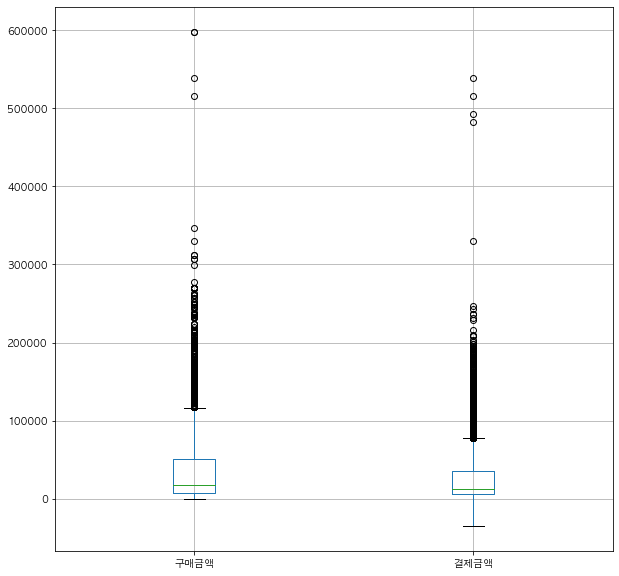

In [8]:
df_raw[['구매금액','결제금액']].boxplot(figsize = (10,10))

In [9]:
# 결제금액 -값 제거
index1 = df_raw[df_raw['결제금액'] == -35166].index

In [10]:
df_raw = df_raw.drop(index1)

<AxesSubplot:>

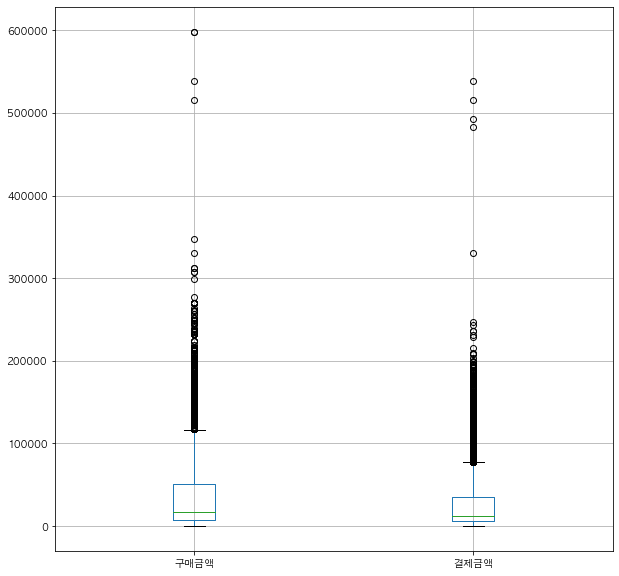

In [11]:
#결제금액 -값 지우고 다시 박스플롯
df_raw[['구매금액','결제금액']].boxplot(figsize = (10,10))

In [12]:
df_raw['주문번호'].value_counts()

202003213565799               10
201902061998499                8
201911073048165                7
201907282648137                7
20200731000929-71103682498     6
                              ..
201903102140250                1
202001163301688                1
202004173672408                1
201903102140242                1
20200805224157-34181488371     1
Name: 주문번호, Length: 182425, dtype: int64

In [13]:
df_raw['물품대분류'].value_counts()

더블하트    37294
체험팩     35488
기저귀     35404
팬티      27659
FMC     25976
FC      12436
SKC      9379
물티슈      8455
기타       7893
SrC        14
Name: 물품대분류, dtype: int64

In [14]:
def del_outlier(df,col,w):
    q_1 = df[col].quantile(0.25)
    q_3 = df[col].quantile(0.75)
    IQR = q_3 - q_1
    lower = q_1 - w * IQR
    upper = q_3 + w * IQR
    df[col] = df[col][df[col]>=lower]
    df[col] = df[col][df[col]<=upper]

In [15]:
# [PT_THICK, PT_WIDTH, FUR_HZ_TIME, FUR_SZ_TIME, ROLLING_TEMP_T5]의 이상치 제거
outlier_list=['구매금액','결제금액']

for i in outlier_list:
    del_outlier(df_raw, i, 1.5)

In [16]:
df_raw.isnull().sum()

주문번호             0
구매일              0
배송시작일            0
배송완료일            0
구매시월령(수정)    31857
고객번호             0
구매금액          4165
결제금액          5374
물품대분류            0
상품명              0
dtype: int64

## 구매시월령(수정) 데이터처리

In [14]:
# df = df_raw[['구매시월령(수정)']]

In [15]:
# df.dropna(inplace=True)

/var/folders/f2/nhwmstw91jvf4lfg4wk_7j440000gn/T/ipykernel_8740/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [17]:
conditionlist = [
    (df_raw['구매시월령(수정)'] >= -10) & (df_raw['구매시월령(수정)'] <= -1),
    (df_raw['구매시월령(수정)'] >= 0) & (df_raw['구매시월령(수정)'] <= 1),
    (df_raw['구매시월령(수정)'] >= 2) & (df_raw['구매시월령(수정)'] <= 12),
    (df_raw['구매시월령(수정)'] >= 13) & (df_raw['구매시월령(수정)'] <= 83),
    (df_raw['구매시월령(수정)'] >= 84) & (df_raw['구매시월령(수정)'] <= 144),
    (df_raw['구매시월령(수정)'] >= 144)]

choicelist = ['태아','신생아','영아','유아','소아','그외']
df_raw['Age_Range'] = np.select(conditionlist, choicelist, default='Nan-Specified')

print(df_raw)

                              주문번호         구매일       배송시작일       배송완료일  \
0                  201905052342970  2019-05-06  2019-05-07  2019-05-11   
1                  202002203424450  2020-02-20  2020-02-21  2020-02-23   
2                  201902282095385  2019-02-28  2019-03-01  2019-03-05   
3                  201905132367003  2019-05-13  2019-05-14  2019-05-16   
4                  201905092356247  2019-05-10  2019-05-11  2019-05-13   
...                            ...         ...         ...         ...   
199994  20200724113704-52679491210  2020-07-24  2020-07-25  2020-07-27   
199995  20200729134816-18220910068  2020-07-29  2020-07-30  2020-08-01   
199996  20200803080150-09054399128  2020-08-03  2020-08-04  2020-08-07   
199997  20200805171023-18783441109  2020-08-06  2020-08-07  2020-08-11   
199998  20200805224157-34181488371  2020-08-06  2020-08-07  2020-08-09   

        구매시월령(수정)                  고객번호     구매금액     결제금액 물품대분류  \
0             4.0       201812310749735  258

In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199998 entries, 0 to 199998
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   주문번호       199998 non-null  object 
 1   구매일        199998 non-null  object 
 2   배송시작일      199998 non-null  object 
 3   배송완료일      199998 non-null  object 
 4   구매시월령(수정)  168141 non-null  float64
 5   고객번호       199998 non-null  object 
 6   구매금액       195833 non-null  float64
 7   결제금액       194624 non-null  float64
 8   물품대분류      199998 non-null  object 
 9   상품명        199998 non-null  object 
 10  Age_Range  199998 non-null  object 
dtypes: float64(3), object(8)
memory usage: 18.3+ MB


array([[<AxesSubplot:title={'center':'구매시월령(수정)'}>,
        <AxesSubplot:title={'center':'구매금액'}>],
       [<AxesSubplot:title={'center':'결제금액'}>, <AxesSubplot:>]],
      dtype=object)

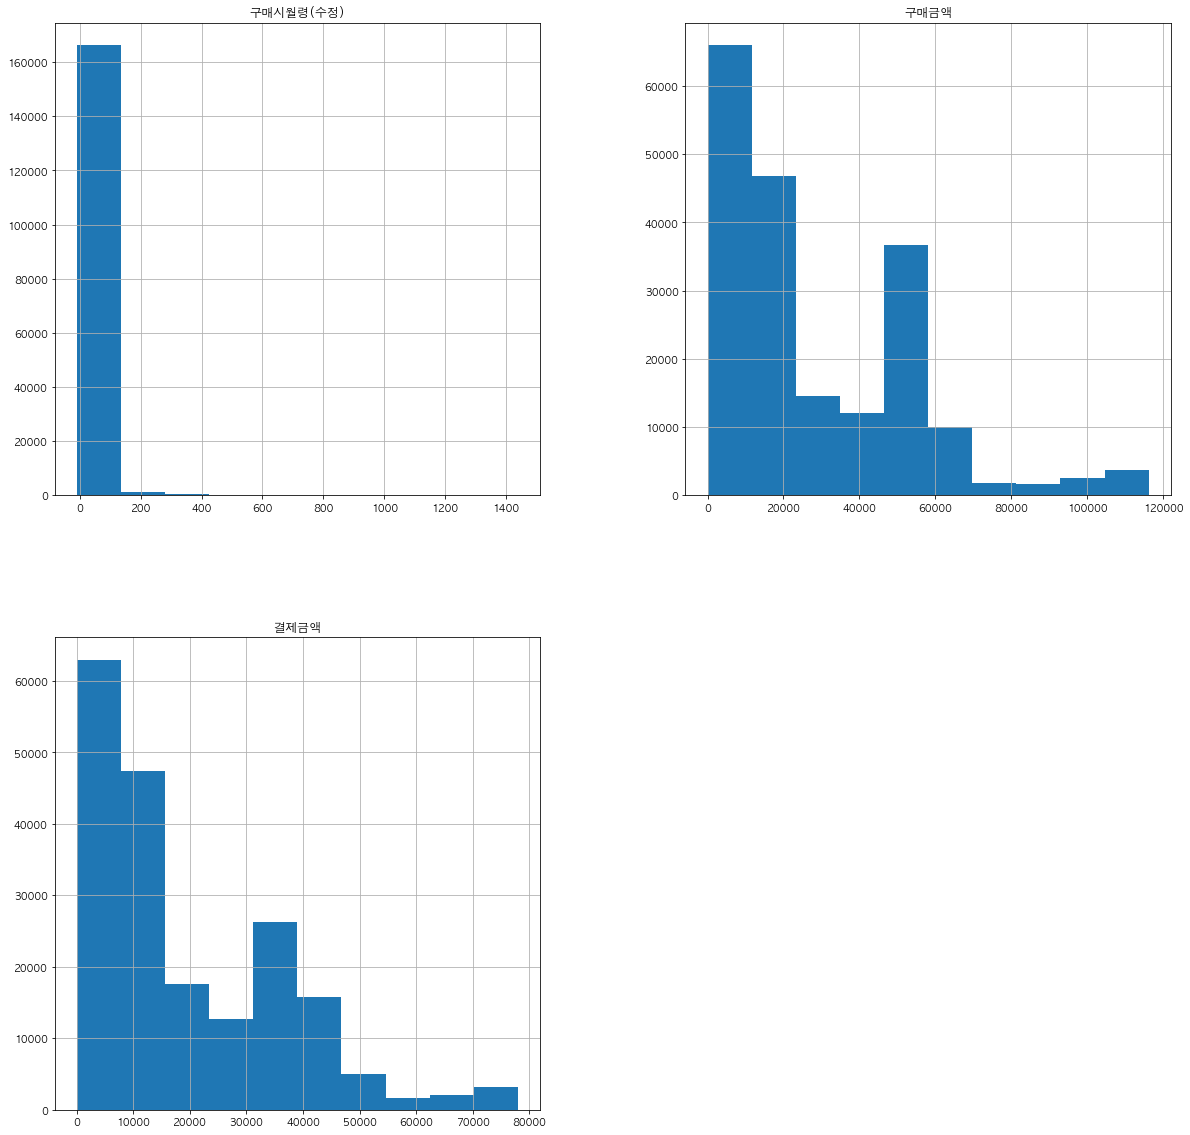

In [19]:
df_raw.hist(figsize = (20,20))

In [20]:
df_count = df_raw['Age_Range'].value_counts()
df_count

영아               84439
유아               38183
Nan-Specified    31857
신생아              26041
태아               14603
소아                3233
그외                1642
Name: Age_Range, dtype: int64

<AxesSubplot:>

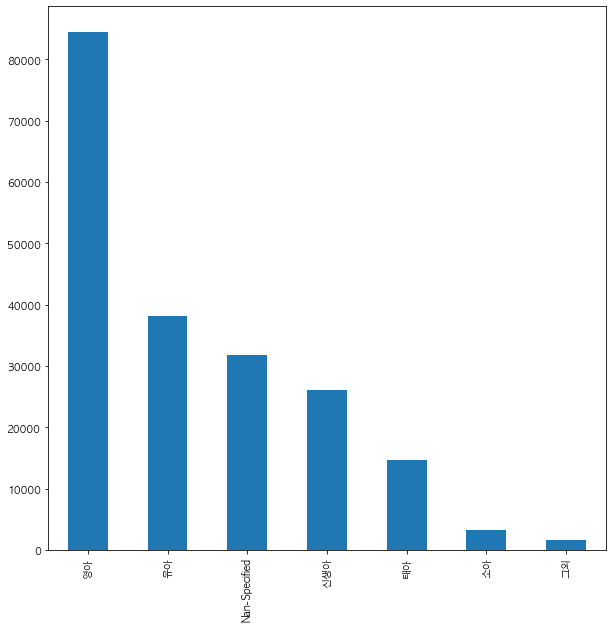

In [21]:
df_count.plot.bar(figsize = (10,10))

In [22]:
from datetime import datetime

df_raw['구매일'] = pd.to_datetime(df_raw['구매일'])
df_raw['배송시작일'] = pd.to_datetime(df_raw['배송시작일'])
df_raw['배송완료일'] = pd.to_datetime(df_raw['배송완료일'])

In [23]:
df_raw['구매일_연도'] = df_raw['구매일'].dt.year
df_raw['구매일_월'] = df_raw['구매일'].dt.month
df_raw['구매일_일'] = df_raw['구매일'].dt.day
df_raw['구매일_요일'] = df_raw['구매일'].dt.day_name()

In [24]:
df_raw.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,Age_Range,구매일_연도,구매일_월,구매일_일,구매일_요일
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800.0,16314.0,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),영아,2019,5,6,Monday
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200.0,37769.0,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),유아,2020,2,20,Thursday
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610.0,3800.0,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,Nan-Specified,2019,2,28,Thursday
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520.0,47922.0,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),유아,2019,5,13,Monday
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640.0,39788.0,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),영아,2019,5,10,Friday


In [101]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199998 entries, 0 to 199998
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype          
---  ------     --------------   -----          
 0   주문번호       199998 non-null  object         
 1   구매일        199998 non-null  datetime64[ns] 
 2   배송시작일      199998 non-null  datetime64[ns] 
 3   배송완료일      199998 non-null  datetime64[ns] 
 4   구매시월령(수정)  168141 non-null  float64        
 5   고객번호       199998 non-null  object         
 6   구매금액       195833 non-null  float64        
 7   결제금액       194624 non-null  float64        
 8   물품대분류      199998 non-null  object         
 9   상품명        199998 non-null  object         
 10  Age_Range  199998 non-null  object         
 11  구매일_연도     199998 non-null  int64          
 12  구매일_월      199998 non-null  int64          
 13  구매일_일      199998 non-null  int64          
 14  구매일_요일     199998 non-null  object         
 15  할인금액       194441 non-null  float64        
 16  배송

### 구매일 시각화

In [25]:
df_year = df_raw['구매일_연도'].value_counts()
df_year

2019    137536
2020     62462
Name: 구매일_연도, dtype: int64

<AxesSubplot:xlabel='count', ylabel='구매일_연도'>

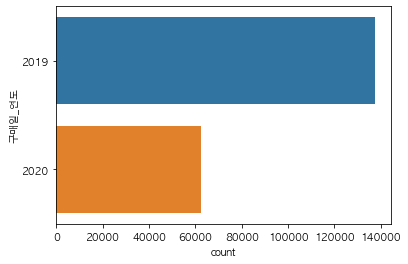

In [26]:
sns.countplot(y = '구매일_연도', data = df_raw)

#### 구매일_연도 - 총 결제금액

In [27]:
df_year_sum = pd.pivot_table(data=df_raw, index = '구매일_연도', values = '결제금액', aggfunc = 'sum')
df_year_sum
result = df_raw.groupby(['구매일_연도'])['결제금액'].sum()

,결제금액
구매일_연도,
2019,2.546402e+09
2020,1.262427e+09


In [97]:
import pandas as pd

# 과학적 표기법 대신 소수점 5자리까지 나타낸다.
pd.options.display.float_format = '{:.5f}'.format

In [94]:
df_year_sum = df_raw.groupby(['구매일_연도'])['결제금액'].sum()
df_year_sum

구매일_연도
2019   2546401763.00000
2020   1262427284.00000
Name: 결제금액, dtype: float64

<AxesSubplot:xlabel='구매일_연도', ylabel='결제금액'>

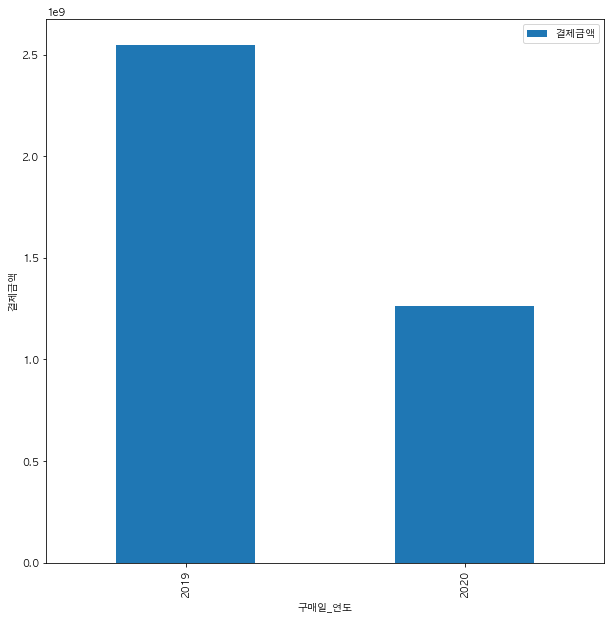

In [28]:
df_year_sum.plot.bar(ylabel = '결제금액', figsize = (10,10))

In [29]:
df_month = df_raw['구매일_월'].value_counts()
df_month

7     21808
3     19599
10    19133
2     19001
12    18034
4     17389
1     16355
6     15930
5     15468
8     13978
9     12829
11    10474
Name: 구매일_월, dtype: int64

<AxesSubplot:>

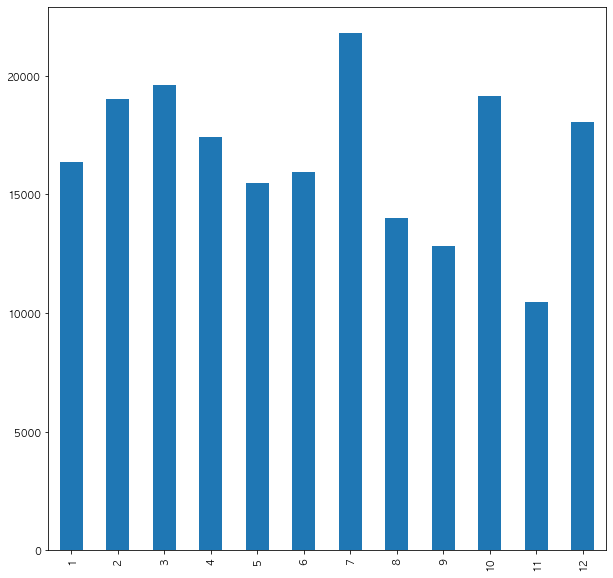

In [30]:
df_month.sort_index(inplace = True);
df_month.plot.bar(figsize = (10,10))

### 구매일_연도.월 - 총결제금액

In [31]:
result = df_raw.groupby(['구매일_연도','구매일_월'])['결제금액'].sum()

In [32]:
result

구매일_연도  구매일_월
2019    1         77753517.0
        2        120179635.0
        3        146023780.0
        4        157010435.0
        5        188014838.0
        6        206587764.0
        7        268666458.0
        8        244906298.0
        9        239230693.0
        10       349324510.0
        11       218356202.0
        12       330347633.0
2020    1        256554455.0
        2        243887342.0
        3        202072911.0
        4        184584919.0
        5        130542337.0
        6         89075278.0
        7        129709810.0
        8         26000232.0
Name: 결제금액, dtype: float64

<AxesSubplot:xlabel='구매일_연도,구매일_월', ylabel='총결제금액'>

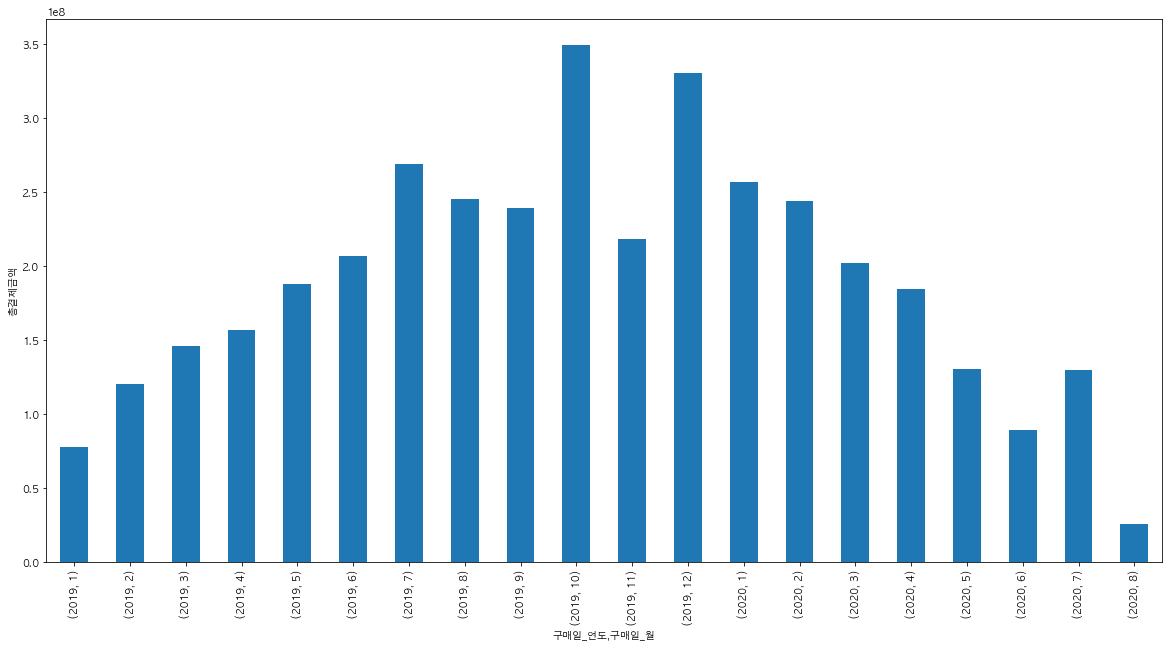

In [33]:
result.plot.bar(ylabel = '총결제금액',figsize=(20,10))

In [34]:
df_day = df_raw['구매일_일'].value_counts()
df_day

21    8107
11    8050
18    7521
30    7517
20    7393
23    7328
1     7290
19    7129
25    7062
17    7029
22    6961
24    6889
29    6692
28    6671
16    6668
26    6299
15    6187
27    6081
2     6002
7     5999
9     5830
10    5823
12    5799
31    5790
3     5741
8     5696
13    5544
14    5490
4     5326
6     5155
5     4929
Name: 구매일_일, dtype: int64

<AxesSubplot:>

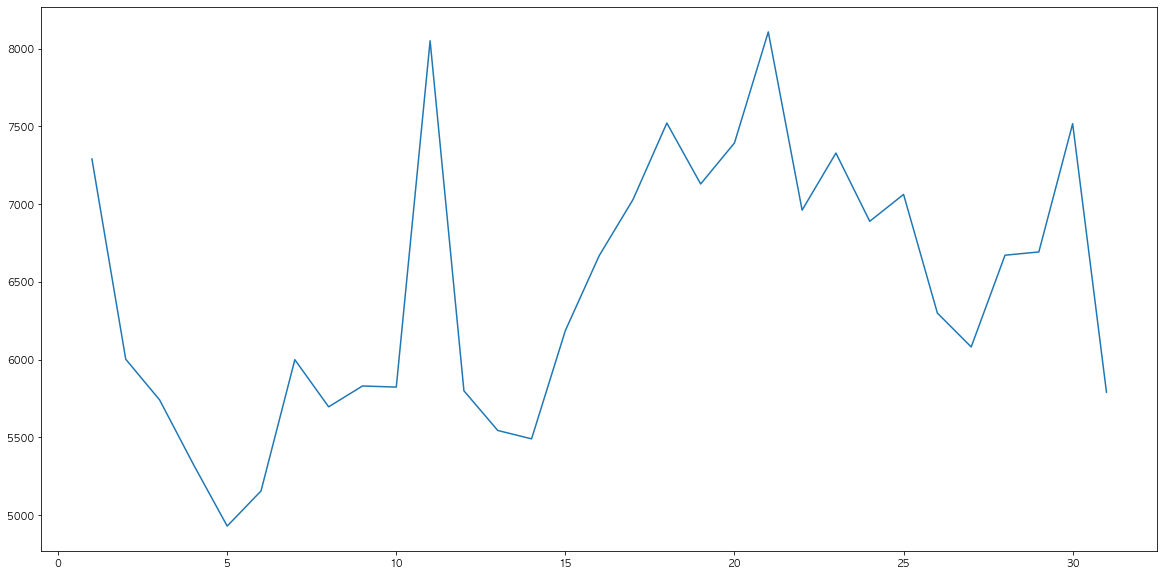

In [35]:
df_day.sort_index(inplace = True);
df_day.plot(figsize = (20,10))

In [36]:
df_weekend = df_raw['구매일_요일'].value_counts()
df_weekend

Tuesday      32731
Wednesday    32616
Thursday     31128
Friday       30629
Monday       29927
Saturday     22331
Sunday       20636
Name: 구매일_요일, dtype: int64

In [37]:
df_weekend = df_weekend[['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday','Sunday']]

<AxesSubplot:>

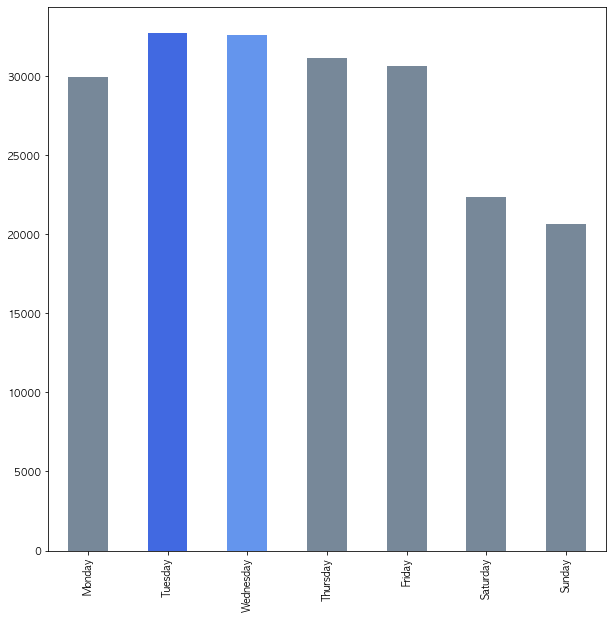

In [38]:
df_weekend.plot.bar(color = ['lightslategray','royalblue','cornflowerblue','lightslategray','lightslategray','lightslategray','lightslategray'], figsize = (10,10))


In [57]:
# 고객들이 가장 많이 결제한 요일
df_weekend_sum = pd.pivot_table(data=df_raw, index = '구매일_요일', values = '결제금액', aggfunc = 'sum')
df_weekend_sum

,결제금액
구매일_요일,
Friday,581855830.0
Monday,592630147.0
Saturday,416922736.0
Sunday,394788151.0
Thursday,587782464.0
Tuesday,621723449.0
Wednesday,613126270.0


In [72]:
weeks = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday','Sunday']

In [75]:
df_weekend_sum = df_weekend_sum.agg(weeks)
df_weekend_sum

,결제금액
Monday,592630147.0
Tuesday,621723449.0
Wednesday,613126270.0
Thursday,587782464.0
Friday,581855830.0
Saturday,416922736.0
Sunday,394788151.0


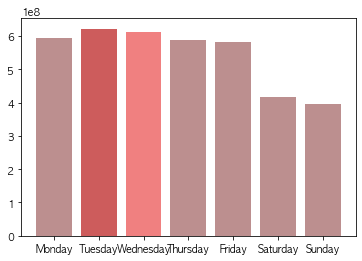

<Figure size 2880x2880 with 0 Axes>

In [91]:
import numpy as np
x = np.arange(7)
weeks= weeks = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday','Sunday']
values = [592630147.0, 621723449.0, 613126270.0, 587782464.0, 581855830.0, 416922736.0, 394788151.0]
colors = ['rosybrown','indianred','lightcoral','rosybrown','rosybrown','rosybrown','rosybrown']
# plt.bar(x, values, width=0.4)
# plt.bar(x, values, width=0.6)
plt.bar(x, values, width=0.8)
# plt.bar(x, values, width=1.0)

plt.bar(x, values, color=colors)
plt.xticks(x, weeks)
plt.figure(figsize = (40,40))
plt.show()

<AxesSubplot:ylabel='결제금액'>

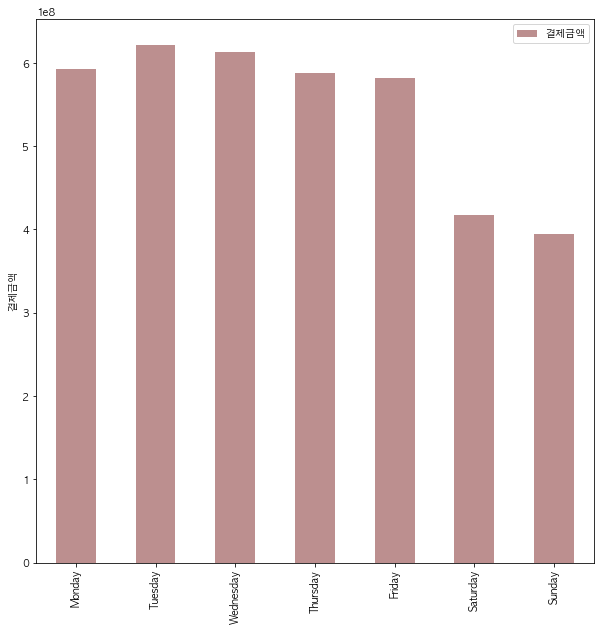

In [79]:
colors = ['rosybrown','indianred','lightcoral','rosybrown','rosybrown','rosybrown','rosybrown']
df_weekend_sum.plot.bar(ylabel = '결제금액', color = colors, figsize = (10,10))


In [41]:
## 상품대분류별 결제금액

In [98]:
df_clas_sum = pd.pivot_table(data=df_raw, index = '물품대분류', values = '결제금액', aggfunc = 'sum')
df_clas_sum

,결제금액
물품대분류,
FC,92277980.00000
FMC,294488235.00000
SKC,115949459.00000
SrC,212480.00000
기저귀,1322591798.00000
기타,112996163.00000
더블하트,613253051.00000
물티슈,131943441.00000
체험팩,180344861.00000


In [99]:
df_clas_sum=df_clas_sum.sort_values('결제금액', ascending = False)

<AxesSubplot:xlabel='물품대분류'>

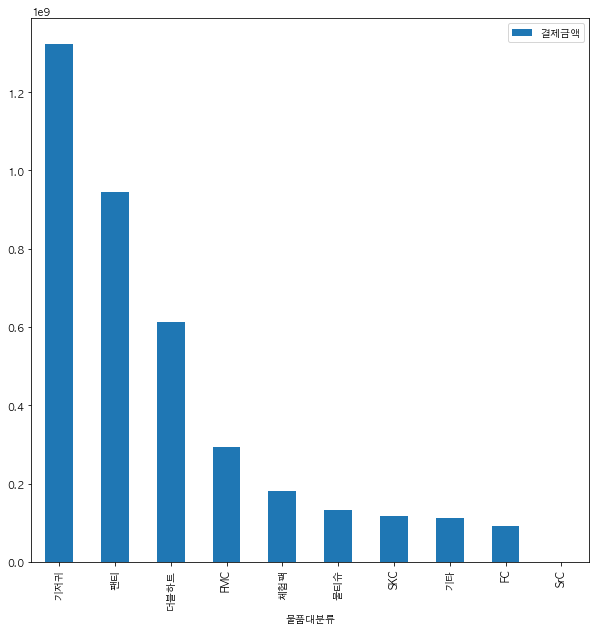

In [100]:
df_clas_sum.plot.bar(figsize = (10,10))

<AxesSubplot:ylabel='None'>

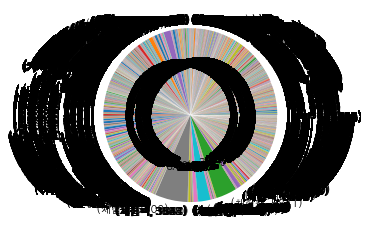

In [176]:
# df_count = df_raw.groupby(["물품대분류", "결제금액"]).size()
# df_count.plot.pie(y = '결제금액', autopct = "%.1f%%", figsize = (4,4))

## 할인금액

In [44]:
df_raw['할인금액'] = df_raw['구매금액'] - df_raw['결제금액']
df_raw.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,Age_Range,구매일_연도,구매일_월,구매일_일,구매일_요일,할인금액
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800.0,16314.0,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),영아,2019,5,6,Monday,9486.0
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200.0,37769.0,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),유아,2020,2,20,Thursday,13431.0
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610.0,3800.0,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,Nan-Specified,2019,2,28,Thursday,1810.0
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520.0,47922.0,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),유아,2019,5,13,Monday,11598.0
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640.0,39788.0,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),영아,2019,5,10,Friday,10852.0


In [45]:
df_raw.describe()

,구매시월령(수정),구매금액,결제금액,구매일_연도,구매일_월,구매일_일,할인금액
count,168141.000000,195833.000000,194624.000000,199998.000000,199998.000000,199998.000000,194441.000000
mean,14.845475,28022.113689,19570.191996,2019.312313,6.292678,16.520355,7945.803673
std,38.521429,24981.985162,16822.352826,0.463438,3.440634,8.833974,8692.406776
min,-10.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,0.000000
25%,2.000000,7280.000000,5841.000000,2019.000000,3.000000,9.000000,1209.000000
50%,6.000000,16900.000000,12276.000000,2019.000000,6.000000,17.000000,4575.000000
75%,13.000000,49900.000000,33614.000000,2020.000000,9.000000,24.000000,13700.000000
max,1439.000000,116200.000000,77995.000000,2020.000000,12.000000,31.000000,92668.000000


## 배송기간

In [46]:
df_raw['배송기간'] = df_raw['배송완료일'] - df_raw['배송시작일']

In [47]:
df_raw['배송기간']

0        4 days
1        2 days
2        4 days
3        2 days
4        2 days
          ...  
199994   2 days
199995   2 days
199996   3 days
199997   4 days
199998   2 days
Name: 배송기간, Length: 199998, dtype: timedelta64[ns]

## 배송준비기간

In [48]:
df_raw['배송준비기간'] = df_raw['배송시작일'] - df_raw['구매일']

In [49]:
df_raw['배송준비기간']

0        1 days
1        1 days
2        1 days
3        1 days
4        1 days
          ...  
199994   1 days
199995   1 days
199996   1 days
199997   1 days
199998   1 days
Name: 배송준비기간, Length: 199998, dtype: timedelta64[ns]

In [50]:
df_raw.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,Age_Range,구매일_연도,구매일_월,구매일_일,구매일_요일,할인금액,배송기간,배송준비기간
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800.0,16314.0,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),영아,2019,5,6,Monday,9486.0,4 days,1 days
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200.0,37769.0,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),유아,2020,2,20,Thursday,13431.0,2 days,1 days
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610.0,3800.0,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,Nan-Specified,2019,2,28,Thursday,1810.0,4 days,1 days
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520.0,47922.0,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),유아,2019,5,13,Monday,11598.0,2 days,1 days
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640.0,39788.0,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),영아,2019,5,10,Friday,10852.0,2 days,1 days


### 월별 구매건수

In [51]:
month_sales = df_raw.groupby(['구매일_연도','구매일_월'])['주문번호'].count()

In [78]:
month_sales

구매일_연도  구매일_월
2019    1         4359
        2         7156
        3         9579
        4         8922
        5         8949
        6        10907
        7        14587
        8        12607
        9        12829
        10       19133
        11       10474
        12       18034
2020    1        11996
        2        11845
        3        10020
        4         8467
        5         6519
        6         5023
        7         7221
        8         1371
Name: 주문번호, dtype: int64

<AxesSubplot:xlabel='구매일_연도,구매일_월', ylabel='총구매건수'>

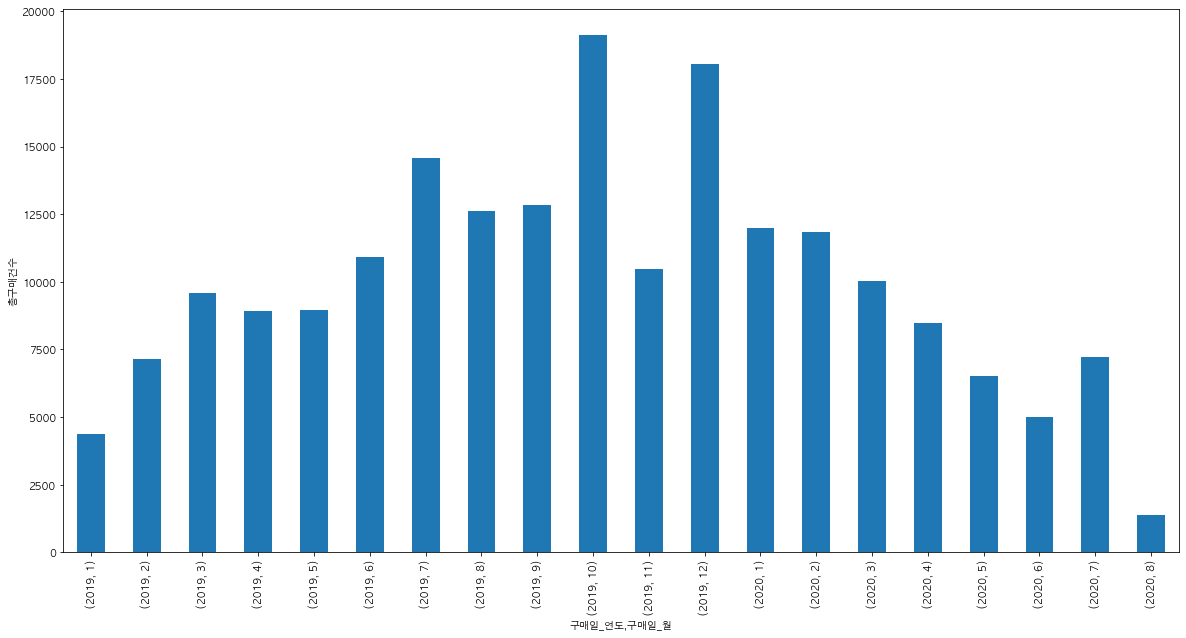

In [52]:
month_sales.plot.bar(ylabel = '총구매건수',figsize=(20,10))

In [95]:
df_raw.corr()

,구매시월령(수정),구매금액,결제금액,구매일_연도,구매일_월,구매일_일,할인금액
구매시월령(수정),1.00000,-0.05130,-0.05075,0.04779,-0.03903,0.01151,-0.05469
구매금액,-0.05130,1.00000,0.97490,0.07517,-0.02845,-0.02570,0.90323
결제금액,-0.05075,0.97490,1.00000,0.05684,-0.02149,-0.03178,0.78502
구매일_연도,0.04779,0.07517,0.05684,1.00000,-0.53055,-0.05097,0.08257
구매일_월,-0.03903,-0.02845,-0.02149,-0.53055,1.00000,-0.00664,-0.02229
구매일_일,0.01151,-0.02570,-0.03178,-0.05097,-0.00664,1.00000,-0.00754
할인금액,-0.05469,0.90323,0.78502,0.08257,-0.02229,-0.00754,1.00000


<AxesSubplot:>

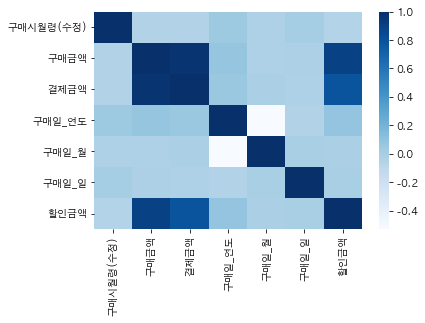

In [96]:
sns.heatmap(df_raw.corr(), cmap="Blues")